# **Predicción de Poliza de Seguro Médico**

## **Predicción de Poliza de Seguro Médico**

En este análisis, tenemos en nuestra cartera aproximadamente 400.000 asegurados con seguro automovil. Los titulares de pólizas de este conjunto de datos ya son nuestros clientes. Lo que toda compañía de seguros pretende hacer es ampliar su cartera vendiendo a sus clientes otro producto de su oferta.

**Como el producto se vende entre segmentos, lo llamamos como 'venta cruzada'.**

Además, solemos dividir nuestra cartera en:
* Negocio de renovaciones: asegurados que acaban de renovar la póliza
* Nuevos negocios: asegurados que tendrán una póliza nuestra la primera vez

En esta investigación de venta cruzada, no tenemos ninguna información sobre nuestra cartera de seguro médico existente. Por lo tanto, este es un análisis empresarial puramente nuevo.

Otro punto importante es que los nuevos modelos de negocios siempre están conectados por los llamados "modelos de la competencia". ¿Por qué? Nuestra empresa es siempre una de las muchas presentes en el mercado de seguros, por lo que no podemos tratarla como una isla solitaria. Lo que se suele hacer es ajustar la tarifa de nuestros competidores y comparar nuestra tarifa con la de ellos. Por tanto, en este caso no produciremos estructuras perfectamente utilizables independientemente del nivel de predicción. Sin embargo, esta gran información nos permite de todos modos realizar una tarea muy absorbente.

## Planteamiento del problema:

La compañía de seguros que brinda seguro de automovil a sus clientes ahora planea brindar un seguro médico. La empresa quiere saber cuántos de sus clientes estarían interesados en adquir un seguros médico.

### Solución
Como solución al problema, realizaremos los siguientes pasos
##### EDA:
Realizaremos un EDA para extraer información valiosa de los datos.

##### Feature Engineering: 
Realice la ingeniería de características para verificar qué columnas juegan un papel muy importante en la construcción del modelo e intente encontrar nuevas características que marquen la diferencia en la construcción del modelo. 

##### Modelación:
Crearemos un conjunto de modelos, para obtener una puntuación de probabilidad que indique las posibilidades de que una persona opte por un seguro médico.

# Tabla de contenido

<a href='#1'>1. Importar Librarias y Dataset </a><br>
<a href='#2'>2. Dataset </a> <br>
<a href='#3'>3. Exploratory Data Analysis y Visualización de Datos </a> <br>
<a href='#4'>4. Procesamiento de Datos</a> <br>
<a href='#5'>5. Regresión Logistica </a> <br>
<a href='#6'>6. Gaussian Naive Bayes </a> <br>
<a href='#7'>7. KNN </a> <br>
<a href='#8'>8. Artificial Neural Networks </a> <br>
<a href='#9'>9. Random Forest </a> <br>
<a href='#10'>10. Gradient Boosting Machines </a> <br>
<a href='#11'>11. Xgboost </a> <br>
<a href='#12'>12. LightGBM </a> <br>
<a href='#13'>13. Comparando todos los Modelos </a> <br>

# <a id='1'> 1. Importando Libreria </a>

In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder 

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

# <a id='2'> 2. Data Set</a>

## **Descripción de los Datos** <br>
**id** <br> Identificador único del cliente <br>
**Gender**<br> Genero del cliente <br>
**Age**<br> Edad del cliente <br>
**Driving_License** <br>
 0 : El cliente no tiene DL <br>
 1 : El cliente tiene DL <br>
**Region_Code**<br> Codigo unico de la región del cliente <br>
**Previously_Insured** <br>
1 : El cliente tiene Vehicle Insurance <br>
0 : El cliente no Vehicle Insurance <br>
**Vehicle_Age** <br> Edad del vehiculo <br>
**Vehicle_Damage**: <br>
1 : El cliente sufrió daños en su vehiculo en el pasado.<br>
0 : El cliente no sufrió daños en su vehiculo en el pasado. <br>
**Annual_Premium**: La cantidad que el cliente debe pagar como prima en el año. <br>
**PolicySalesChannel**<br> Canal de venta de la poliza ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
**Vintage**<br> Número de días que el cliente ha esta asociado a la empresa <br>
**Response** <br>
1 : El cliente esta interesado en adquir una poliza de seguro médico <br>
0 : El cliente no esta interesado en adquir una poliza de seguro médico<br>

** Link de Descarga: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction <br>

In [ ]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#sample_sub = pd.read_csv('sample_submission.csv')

#train = pd.read_csv('/Users/lbarraganm/Downloads/Health_Insurance_Cross_sell_prediction/train.csv')
#test = pd.read_csv('/Users/lbarraganm/Downloads/Health_Insurance_Cross_sell_prediction/test.csv')
#sample_sub = pd.read_csv('/Users/lbarraganm/Downloads/Health_Insurance_Cross_sell_prediction/sample_submission.csv')

train = pd.read_csv('https://github.com/lbarraganm/ml_ejemplos/blob/master/Health_Insurance_Cross_sell_prediction/train.csv?raw=true',sep=',',decimal='.')
test = pd.read_csv('https://github.com/lbarraganm/ml_ejemplos/blob/master/Health_Insurance_Cross_sell_prediction/test.csv?raw=true',sep=',',decimal='.')
sample_sub= pd.read_csv('https://github.com/lbarraganm/ml_ejemplos/blob/master/Health_Insurance_Cross_sell_prediction/sample_submission.csv?raw=true',sep=',',decimal='.')

df=train.copy()



In [ ]:
#train=train.drop(['id'], axis=1)
#test=test.drop(["id"], axis=1)
#df=df.drop(["id"], axis=1)

In [ ]:
#Conjunto de prueba
test.head(5)

In [ ]:
#Conjunto de entrenamiento
train.head(5)

In [ ]:
# showing last 5 rows
df.tail()

In [ ]:
# check datatypes, shape,null values
print(df.info())
print()
print(df.isna().sum())

In [ ]:
df.info()

In [ ]:
#Statistical Summary of Numeric Variables
df.describe()

In [ ]:
#Nombre de las columnas
df.columns

In [ ]:
#Vericamos si tenemos valores nulos o pérdidos
df.isnull().values.any()

In [ ]:
df.isnull().sum()

In [ ]:
df.corr()

## ** Coeficientes de correlación lineal ** <br>


Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

## 0: asociación nula. 

## 0.1: asociación pequeña.

## 0.3: asociación mediana. 

## 0.5: asociación moderada.

## 0.7: asociación alta. 

## 0.9: asociación muy alta. 

Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.


In [ ]:

f, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=3, cmap='YlGn')


In [ ]:
# importing libraries
from numpy import mean
from numpy import std
from matplotlib import pyplot


# creating data for columns
d1 = df['Age']
d2 = df['Policy_Sales_Channel']

# let's convert to a dataframe
dfcorr = pd.DataFrame({'Column1': d1, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [ ]:
dfcorr.corr(method ='pearson')

In [ ]:
dfcorr.corr(method ='spearman')

In [ ]:
dfcorr.corr(method ='kendall') 

In [ ]:
import scipy

# creating X-Y Plots With a Regression Line

# slope, intersept, and correlation coefficient calculation 
slope, intercept, r, p, stderr = scipy.stats.linregress(dfcorr['Column1'], dfcorr['Column2'])

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# plotting
fig, ax = pyplot.subplots(figsize = (14,8))
ax.plot(dfcorr['Column1'], dfcorr['Column2'], linewidth=0, marker='s', label='Data points')
ax.plot(dfcorr['Column1'], intercept + slope * dfcorr['Column1'], label=line)
ax.set_xlabel('Column1')
ax.set_ylabel('Column2')
ax.legend(facecolor='white')
pyplot.show()

In [ ]:
slope, intercept, r, p, stderr

La más relevante es la relación entre "Respuesta" y el resto de variables. En este caso veo alguna correlación entre Respuesta y "Vehicle_Damage", además hay una relación negativa con la variable binaria "Previously_Insured". Otras relaciones interesantes:
* la edad está fuertemente correlacionada con la edad del automóvil. Es bien sabido en la relación actuarial mundial que los jóvenes conducen automóviles viejos
* edad con canal de ventas, las personas mayores tienden a usar corredores y agentes, los jóvenes usan Internet
* previamente asegurado se correlaciona con la edad y la edad del vehículo. Los jóvenes tienden a cambiar de aseguradora a menudo
* previamente asegurado con daños en el vehículo, de hecho, muchos titulares de polos cambian de asegurador mientras corren un gran riesgo
* **Antigüedad del vehículo y canal de venta de pólizas: este es un efecto espurio interesante. El efecto subyacente real es la relación entre la edad y el canal de ventas, lo que influye indirectamente en las cifras de la antigüedad del vehículo**

# <a id='3'> 3. Exploratory Data Analysis y Visualizacióon de Datos </a> 


In [ ]:
df_gender=df['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})
print(df_gender)

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Response'],data=df)

In [ ]:

fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Recuendo de Genero",title_x=0.5)
fig.show()

In [ ]:
# Violin Boxplot

df_agevi=df['Age']
fig = go.Figure(data=go.Violin(y=df_agevi, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Age'))

fig.update_layout(yaxis_zeroline=False,title="Distribución de la Edad",title_x=0.5)
fig.show()

In [ ]:
fig = go.Figure(go.Box(y=df['Age'],name="Age ")) # to get Horizonal plot change axis   
fig.update_layout(title="Distribution of Age ",title_x=0.5)
fig.show()

In [ ]:
sns.boxplot(df['Age'])
plt.title("Distribution of Age")

In [ ]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)
plt.title("Age VS Response")

In [ ]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Age'], color = 'BlueViolet')
plt.title('Distribución de la Edad', fontsize = 14)
plt.show()

In [ ]:
#plt.clf()
#plt.cla()
#plt.close()

In [ ]:
print(max(df['Annual_Premium'].astype(int)))
print(min(df['Annual_Premium'].astype(int)))

In [ ]:


max_nn_i = max(df['Annual_Premium'].astype(int))
min_nn_i = min(df['Annual_Premium'].astype(int))

#mu, sigma = 0, 0.1 # media y desvio estandar


s = df['Annual_Premium']
mu, sigma, var = s.mean(), np.std(s) , np.var(s)
    

plt.rcParams['figure.figsize'] = (15, 5)

plt.title('Distribución Annual_Premium', fontsize = 14)

cuenta, cajas, ignorar = plt.hist(s,bins=100,density=True, histtype='bar', alpha=.5)


normal = plt.plot(cajas, 1/(np.sqrt(2 * np.pi * var)) *
         np.exp( - (cajas - mu)**2 / (2 * var) ),
         linewidth=2, color='r')


plt.show()

In [ ]:
s.describe()

In [ ]:
display(s.dtypes)

In [ ]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(s, color = 'Orange')
plt.title('Distribución Annual_Premium', fontsize = 14)
plt.show()

In [ ]:


max_nn_i = max(df['Age'].astype(int))
min_nn_i = min(df['Age'].astype(int))

#mu, sigma = 0, 0.1 # media y desvio estandar


s = df['Age']
mu, sigma, var = s.mean(), np.std(s) , np.var(s)
    

plt.rcParams['figure.figsize'] = (15, 5)

plt.title('Distribución Edad', fontsize = 14)

cuenta, cajas, ignorar = plt.hist(s,bins=50,density=True, histtype='bar', alpha=.5)


normal = plt.plot(cajas, 1/(np.sqrt(2 * np.pi * var)) *
         np.exp( - (cajas - mu)**2 / (2 * var) ),
         linewidth=2, color='r')


plt.show()

In [ ]:
s.describe()

In [ ]:
df['age_category']=np.where((df['Age']<20),"Menor 20",
                   np.where((df['Age']>19)&(df['Age']<=30),"20-30",
                   np.where((df['Age']>30)&(df['Age']<=48),"31-48",
                   np.where((df['Age']>48)&(df['Age']<=70),"49-70",
                   np.where((df['Age']>70)&(df['Age']<=80),"71-80",
                   np.where(df['Age']>80,"Mayor 80","NULL"))))))

age=df['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'Count'})


fig = go.Figure(data=[go.Scatter(
    x=age['age_category'], y=age['Count'],
    mode='markers',
    marker=dict(
        color=age['Count'],
        size=age['Count']*0.0005,
        showscale=True
    ))])

fig.update_layout(title=' Edad ',xaxis_title="Categoria de la Edad",yaxis_title="Número de Personas",title_x=0.5)
fig.show()

In [ ]:
df.head(10)

In [ ]:
df_VD=df.groupby(by =['Gender','age_category','Vehicle_Damage'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Vehicle_Damage':'Vehicle_Damage','age_category':'Age Category','Age':'Count'})
df_VD['Vehicle_Damage']=df_VD['Vehicle_Damage'].astype('category')
df_VD

In [ ]:
fig = px.bar(df_VD, x="Vehicle_Damage", y="Count",color="Age Category",barmode="group",
             facet_row="Gender"
             )


fig.update_layout(title_text='Age Category With Vehicle Damage And Gender',title_x=0.5)
fig.show()

El gráfico anterior muestra la relación entre genero, daños del vehículo y la edad del vehículo

In [ ]:
df_Vehicle_Damage=df['Vehicle_Damage'].value_counts().to_frame().reset_index().rename(columns={'index':'Vehicle_Damage','Vehicle_Damage':'count'})
print(df_Vehicle_Damage)

In [ ]:
fig = go.Figure([go.Pie(labels=df_Vehicle_Damage['Vehicle_Damage'], values=df_Vehicle_Damage['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Vehicle Damage",title_x=0.5)
fig.show()

In [ ]:
df_Vintage=df.groupby(by =['Gender','age_category'])['Vintage'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','age_category':'Age Category','Vintage':'Days'})
df_Vintage

In [ ]:

fig = px.bar(df_Vintage, x="Age Category", y="Days",
             color="Gender",barmode="group")
               
fig.update_layout(title_text='Average Vintage Days With Gender,Age Class',title_x=0.5)
fig.show()

Previously_Insured Vs Response

In [ ]:
sns.countplot(x='Previously_Insured',hue='Response',data=df, palette='husl')

Customer who are not perviosly insured are likely to be inetrested

Vehicle_Age Vs Response

In [ ]:
sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette='husl')

En el gráfico anterior muestra el número días que el cliente ha tenido alguna relación con la empresa relacionado con la edad y también el genero.

In [ ]:
df_PSC=df.Policy_Sales_Channel.value_counts().to_frame().reset_index()[0:10]

df_PSC['index']='PSC_Cod '+df_PSC['index'].astype('str')


fig = go.Figure(go.Bar(
    x=df_PSC['index'],y=df_PSC['Policy_Sales_Channel'],
    marker={'color': df_PSC['Policy_Sales_Channel'], 
    'colorscale': 'sunsetdark'},  
    text=df_PSC['Policy_Sales_Channel'],
    textposition = "outside",
))
fig.update_layout(title_text=' Código de canal de ventas las polizas de seguro',xaxis_title="Value",
                  yaxis_title="Número de persona",title_x=0.5)
fig.show()

El gráfico anterior muestra los 10 principales canales de ventas de las poliza de seguros.

In [ ]:
df_PSC=df.Policy_Sales_Channel.value_counts().to_frame().reset_index()[0:10]
indexs=df_PSC['index']
df_PSC_age=df.groupby('Policy_Sales_Channel')['Age'].mean().to_frame().reset_index()

avg_age = []
age_cod=[]
for number in indexs:
    
    df_PSC_age_top1=df_PSC_age[df_PSC_age['Policy_Sales_Channel']==number]['Age']
    avg_age.extend(df_PSC_age_top1)
        
         
df_PSC_age = pd.DataFrame(avg_age)
df_PSC_Cod= pd.DataFrame(indexs)


frames = [df_PSC_age, df_PSC_Cod]

result = pd.concat(frames,axis=1)

result.columns = ['Age', 'Cod']

result['Cod']='PSC_Cod '+result['Cod'].astype('str')

fig = go.Figure(go.Bar(
    x=result['Cod'],y=result['Age'],
    marker={'color': result['Age'], 
    'colorscale': 'sunsetdark'},  
    text=result['Age'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Policy Sales Channel Code Average Age',xaxis_title="Policy Sales Channel",yaxis_title="Age",title_x=0.5)
fig.show()

El gráfico anterior muestra los 10 principales canales de ventas de las poliza de seguros relacionado con la edad de los asegurados.

In [ ]:
df_DL=df.groupby(by =['Gender','Driving_License'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','age_category':'Age Category','Age':'count'})
df_DL['Driving_License']=df_DL['Driving_License'].astype('category')
df_DL

In [ ]:
fig = px.bar(df_DL, x="Driving_License", y="count",
             color="Gender",barmode="group")
               
fig.update_layout(title_text='Gender With Driving License',title_x=0.5)
fig.show()

El gráfico anterior muestra quienes tiene licencia de conducir según genero.
0: nos indcia que no tiene licencia de conducir
1: Tiene licencia de conducir

El gráfico Muestra que los hombres poseen más licencia de conducir que las mujeres.

In [ ]:
df_Driving_License=df['Driving_License'].value_counts().to_frame().reset_index().rename(columns={'index':'Driving_License','Driving_License':'count'})
print(df_Driving_License)

In [ ]:


fig = go.Figure([go.Pie(labels=df_Driving_License['Driving_License'], values=df_Driving_License['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Customer Driving License",title_x=0.5)
fig.show()

               Driving_License 
         0 : Customer does not have DL 
         1 : Customer already has DL 

In [ ]:
df_RGC=df.Region_Code.value_counts().to_frame().reset_index()[0:10]

df_RGC['index']='R_Cod '+df_RGC['index'].astype('str')


fig = go.Figure(go.Bar(
    x=df_RGC['index'],y=df_RGC['Region_Code'],
    marker={'color': df_RGC['Region_Code'], 
    'colorscale': 'portland'},  
    text=df_RGC['Region_Code'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Region Code',xaxis_title="Region Code",yaxis_title="Number Of People",title_x=0.5)
fig.show()

In [ ]:


df_V_Age=df['Vehicle_Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Vehicle_Age','Vehicle_Age':'Count'})


fig = go.Figure(data=[go.Scatter(
    x=df_V_Age['Vehicle_Age'], y=df_V_Age['Count'],
    mode='markers',
    marker=dict(
        color=df_V_Age['Count'],
        size=df_V_Age['Count']*0.0005,
        showscale=True
    ))])

fig.update_layout(title='Vehicle Age ',xaxis_title=" Vehicle Age ",yaxis_title="Number Of Vehicle",title_x=0.5)
fig.show()

El gráfico anterior muestra la relación del año del vehículo y el número de vehículo

In [ ]:
df_VAge_AP_mean=df.groupby(by =['Vehicle_Age'])['Annual_Premium'].mean().to_frame().reset_index().rename(columns={'Vehicle_Age':'Vehicle_Age','Annual_Premium':'Annual_Premium'})
df_VAge_AP_mean

In [ ]:
fig = go.Figure(go.Bar(
    x=df_VAge_AP_mean['Vehicle_Age'],y=df_VAge_AP_mean['Annual_Premium'],
    marker={'color': df_VAge_AP_mean['Annual_Premium'], 
    'colorscale': 'portland'},  
    text=df_VAge_AP_mean['Annual_Premium'],
    textposition = "outside",
))
fig.update_layout(title_text='Vehicle Age With Annual Premium',xaxis_title="Vehicle Age",yaxis_title="Premium Price",title_x=0.5)
fig.show()

El gráfico anterior muestra la relación año del vehículo y la prima de seguro. Podemos ver que las personas que tienen automovil mayor a dos años, el precio de la prima es mayor.

In [ ]:
df_Response=df['Response'].value_counts().to_frame().reset_index().rename(columns={'index':'Response','Response':'count'})


fig = go.Figure([go.Pie(labels=df_Response['Response'], values=df_Response['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Response",title_x=0.5)
fig.show()

El gráfico anterior muestra la cantidad de personas quienes están interesado en poder adquir una poliza de seguro.
1: el cliente esta interesado en la poliza de seguro médico

In [ ]:
df_gender_Previously_Insured=df.groupby(by =['Gender','Previously_Insured'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Previously_Insured':'Previously_Insured','Age':'Count'})
df_gender_Previously_Insured['Previously_Insured']=df_gender_Previously_Insured['Previously_Insured'].astype('category')
print(df_gender_Previously_Insured)

In [ ]:
fig = px.bar(df_gender_Previously_Insured, x="Gender", y="Count",color="Previously_Insured",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Previously Insured',title_x=0.5)
fig.show()

El gráfico anterior muestra la relación de los que poseen una poliza de seguro según su genero.
0: el cliente no tiene vehiculo asegurado.
1: El cliente tiene vehículo asegurado.

Se puede observar que los hombres son los que no poseen seguro vehícular

In [ ]:
df_gender_response=df.groupby(by =['Gender','Response'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Response':'Response','Age':'Count'})
df_gender_response['Response']=df_gender_response['Response'].astype('category')
print(df_gender_response)

In [ ]:
fig = px.bar(df_gender_response, x="Gender", y="Count",color="Response",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Response',title_x=0.5)
fig.show()

En el gráfico anterior muestra la relación de las personas que están interesado en adquirir una poliza de seguro según su genero.

Se puede obvervar que la mayoria de las personas no están interesado en adquir una poliza de seguro.

In [ ]:
df_gender_Vehicle_Age=df.groupby(by =['Response','Vehicle_Age'])['Age'].count().to_frame().reset_index().rename(columns={'Response':'Response','Vehicle_Age':'Vehicle_Age','Age':'Count'})
df_gender_Vehicle_Age['Response']=df_gender_Vehicle_Age['Response'].astype('category')
print(df_gender_Vehicle_Age)

In [ ]:
fig = px.bar(df_gender_Vehicle_Age, x="Response", y="Count",color="Vehicle_Age",barmode="group",
             
             )
fig.update_layout(title_text='Response With Vehicle Age',title_x=0.5)
fig.show()

El gráfico anterior muestra la relación de las personas que están interesado en adquir una poliza de seguro en la relación con el año de vehículo.

# <a id='4'>4. Preprocesamiento de Datos </a>

In [ ]:
df_model=df.copy()
df_model.head(5)

In [ ]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
df_model['Gender'] = labelEncoder.fit_transform(df_model['Gender'])
df_model['Vehicle_Age'] = labelEncoder.fit_transform(df_model['Vehicle_Age'])
df_model['Vehicle_Damage'] = labelEncoder.fit_transform(df_model['Vehicle_Damage'])

In [ ]:
df_model.dtypes

In [ ]:
#gender_map= {'Male':0,'Female':1}
#vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
#vehicle_damage_map= {'Yes':1,'No':0}

#df_model['Gender']= df_model['Gender'].map(gender_map)
#df_model['Vehicle_Age']= df_model['Vehicle_Age'].map(vehicle_age_map)
#df_model['Vehicle_Damage']= df_model['Vehicle_Damage'].map(vehicle_damage_map)

df_model.head(5)

In [ ]:
#df_model['Region_Code']=df_model['Region_Code'].astype(int)
#df_model['Policy_Sales_Channel']=df_model['Policy_Sales_Channel'].astype(int)

df_model.info()

In [ ]:
duplicate=df_model[df_model.duplicated()]
print(duplicate)

## Factor de valor atípico local

<img src="http://upload.wikimedia.org/wikipedia/commons/4/4e/LOF-idea.svg" width="300" height="250">


*  El factor de valor atípico local se basa en un concepto de densidad local, donde la localidad viene dada por k vecinos más cercanos, cuya distancia se usa para estimar la densidad. Al comparar la densidad local de un objeto con las densidades locales de sus vecinos, se pueden identificar regiones de densidad similar y puntos que tienen una densidad sustancialmente menor que sus vecinos. Estos se consideran valores atípicos.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [ ]:
df_out=df_model.copy()
df_out=df_out.drop(['age_category'],axis=1)

n_outliers = len(df_out)
ground_truth = np.ones(len(df_out), dtype=int)
ground_truth[-n_outliers:] = -1

y_pred = clf.fit_predict(df_out)
n_errors = (y_pred != ground_truth).sum()
df_scores = clf.negative_outlier_factor_


In [ ]:
df_scores[0:10]

In [ ]:
print(n_errors)
#Número de vecinos alejados de -1
len(df_out) - n_errors

In [ ]:
np.sort(df_scores)[0:50]

In [ ]:
threshold_value = np.sort(df_scores)[1]
threshold_value

In [ ]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

In [ ]:
# Kick Outliers
for i in indexs:
    df_model.drop(i, axis = 0,inplace = True)

In [ ]:
y=df_model['Response']
X=df_model.drop(['Driving_License','Response','age_category'],axis=1)


print('X shape :',X.shape)
print('y shape :',y.shape)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

We can remove less important features from the data set

In [ ]:
X=X.drop(['Gender'],axis=1)

In [ ]:
X.head(5)

Handling Imbalanced data

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

In [ ]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [ ]:
x_new.head()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(df_model.corr(), ax=ax, annot=True, linewidths=3, cmap='YlGn')

La más relevante es la relación entre "Respuesta" y el resto de variables. En este caso veo alguna correlación entre Respuesta y "Vehicle_Damage", además hay una relación negativa con la variable binaria "Previously_Insured". Otras relaciones interesantes:
* la edad está fuertemente correlacionada con la edad del automóvil. Es bien sabido en la relación actuarial mundial que los jóvenes conducen automóviles viejos
* edad con canal de ventas, las personas mayores tienden a usar corredores y agentes, los jóvenes usan Internet
* previamente asegurado se correlaciona con la edad y la edad del vehículo. Los jóvenes tienden a cambiar de aseguradora a menudo
* previamente asegurado con daños en el vehículo, de hecho, muchos titulares de polos cambian de asegurador mientras corren un gran riesgo
* **Antigüedad del vehículo y canal de venta de pólizas: este es un efecto espurio interesante. El efecto subyacente real es la relación entre la edad y el canal de ventas, lo que influye indirectamente en las cifras de la antigüedad del vehículo**

In [ ]:
# Normalize
x_new = (x_new - np.min(x_new)) / (np.max(x_new) - np.min(x_new)).values
x_new.head()

In [ ]:
#dividing the dataset into training and testing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


In [ ]:
X_train

In [ ]:
##dividing the dataset into training and testing
#X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0) 
#print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

##feature scaling
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

*   Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)
*   Dataset has more than 300k records
*   cannot go with SVM Classifier as it takes more time to train as dataset.

# <a id='4.5'>4.5 Transformación de Datos </a>

1. Transformación Yeo-Johnson
2. Transformación Box-Cox
3. Raíz cuadrada
4. Raíz cúbica
5. Transformación logarítmica

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2)

h1 = go.Histogram(x=X['Age'], name = "Age")
h2 = go.Histogram(x=X['Vintage'], name = "Vintage")
h3 = go.Histogram(x=X['Vehicle_Damage'], name = "Vehicle_Damage")
h4 = go.Histogram(x=X['Previously_Insured'], name = "Previously_Insured")
h5 = go.Histogram(x=X['Annual_Premium'], name = "Annual_Premium")



fig.append_trace(h1,1,1)
fig.append_trace(h2,1,2)
fig.append_trace(h3,2,1)
fig.append_trace(h4,2,2)
fig.append_trace(h5,3,1)
fig.show()


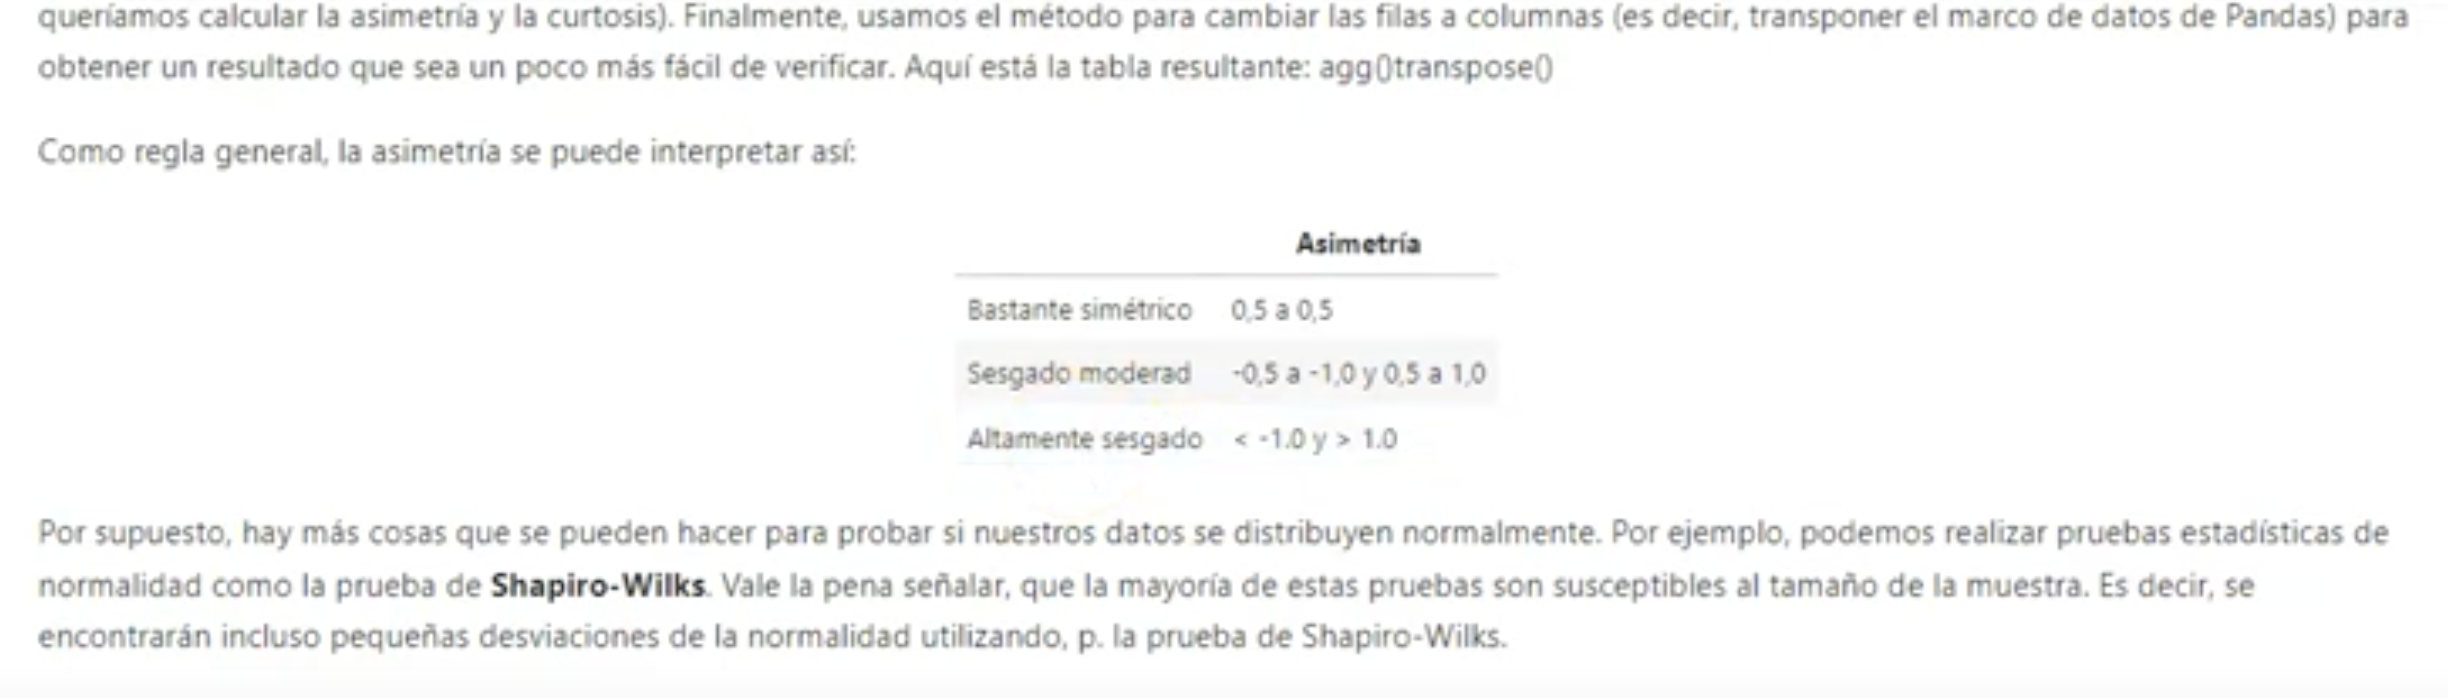

In [ ]:
#Medidas de asimetría y curtosis ( Por lo tanto, la curtosis mide únicamente los valores atípicos; no mide nada sobre el "pico")

X.agg(['skew','kurtosis']).transpose()

###Transformación de Raíz Cuadrada

In [ ]:
def diagnostic_grafico (df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title(variable)
  df[variable].hist(bins=30, edgecolor = 'black')
  plt.subplot(1,2,2)
  stats.probplot( df[variable] , dist="norm", plot = plt)
  plt.title("Gráfico Q-Q")
  plt.show()



In [ ]:
diagnostic_grafico (df, "Age")

In [ ]:
diagnostic_grafico (df, "Vintage")

In [ ]:
diagnostic_grafico (df, "Previously_Insured")

In [ ]:
diagnostic_grafico (df, "Annual_Premium") 

In [ ]:
df1 = X.copy()
# Vintage es col 8 , Age es col 1
df1.iloc[:,1]

In [ ]:
df1["Transformation-Sqrt"] = np.sqrt (X['Age'])
df1.head()

In [ ]:
diagnostic_grafico (df1, "Transformation-Sqrt") 

###Transformación Log

In [ ]:
df1["Transformation-Log"] = np.log ( X['Age'])
df1.head()

In [ ]:
diagnostic_grafico (df1, "Transformation-Log") 

###Transformación Raíz Cúbica

In [ ]:
df1["Transformation-Cúbica"] = np.cbrt ( X['Age'])
df1.head()

In [ ]:
diagnostic_grafico (df1, "Transformation-Cúbica") 

###Transformación de potencia "Yeo-Johnson"

In [ ]:
df2 = X.copy()

In [ ]:
# La transformación Box-Cox estrictamente valores positivos, Yeo-Johnson positivos como negativos.
from sklearn.preprocessing import PowerTransformer
p_scaler = PowerTransformer (method='yeo-johnson')
A_p = pd.DataFrame (p_scaler.fit_transform(df2))

In [ ]:
A_p.head()

In [ ]:
A_p = A_p.rename(columns={0:"Id",1:"Age", 2:"Region_Code", 3:	"Previously_Insured", 4:	"Vehicle_Age", 5:	"Vehicle_Damage", 6:	"Annual_Premium",	7: "Policy_Sales_Channel", 8:	"Vintage"})
A_p.head()
	

In [ ]:
A_p.describe()

In [ ]:
diagnostic_grafico (X, "Age") 

In [ ]:
diagnostic_grafico (A_p, "Age") 

###Transformación de potencia "Box-Cox" SciPy

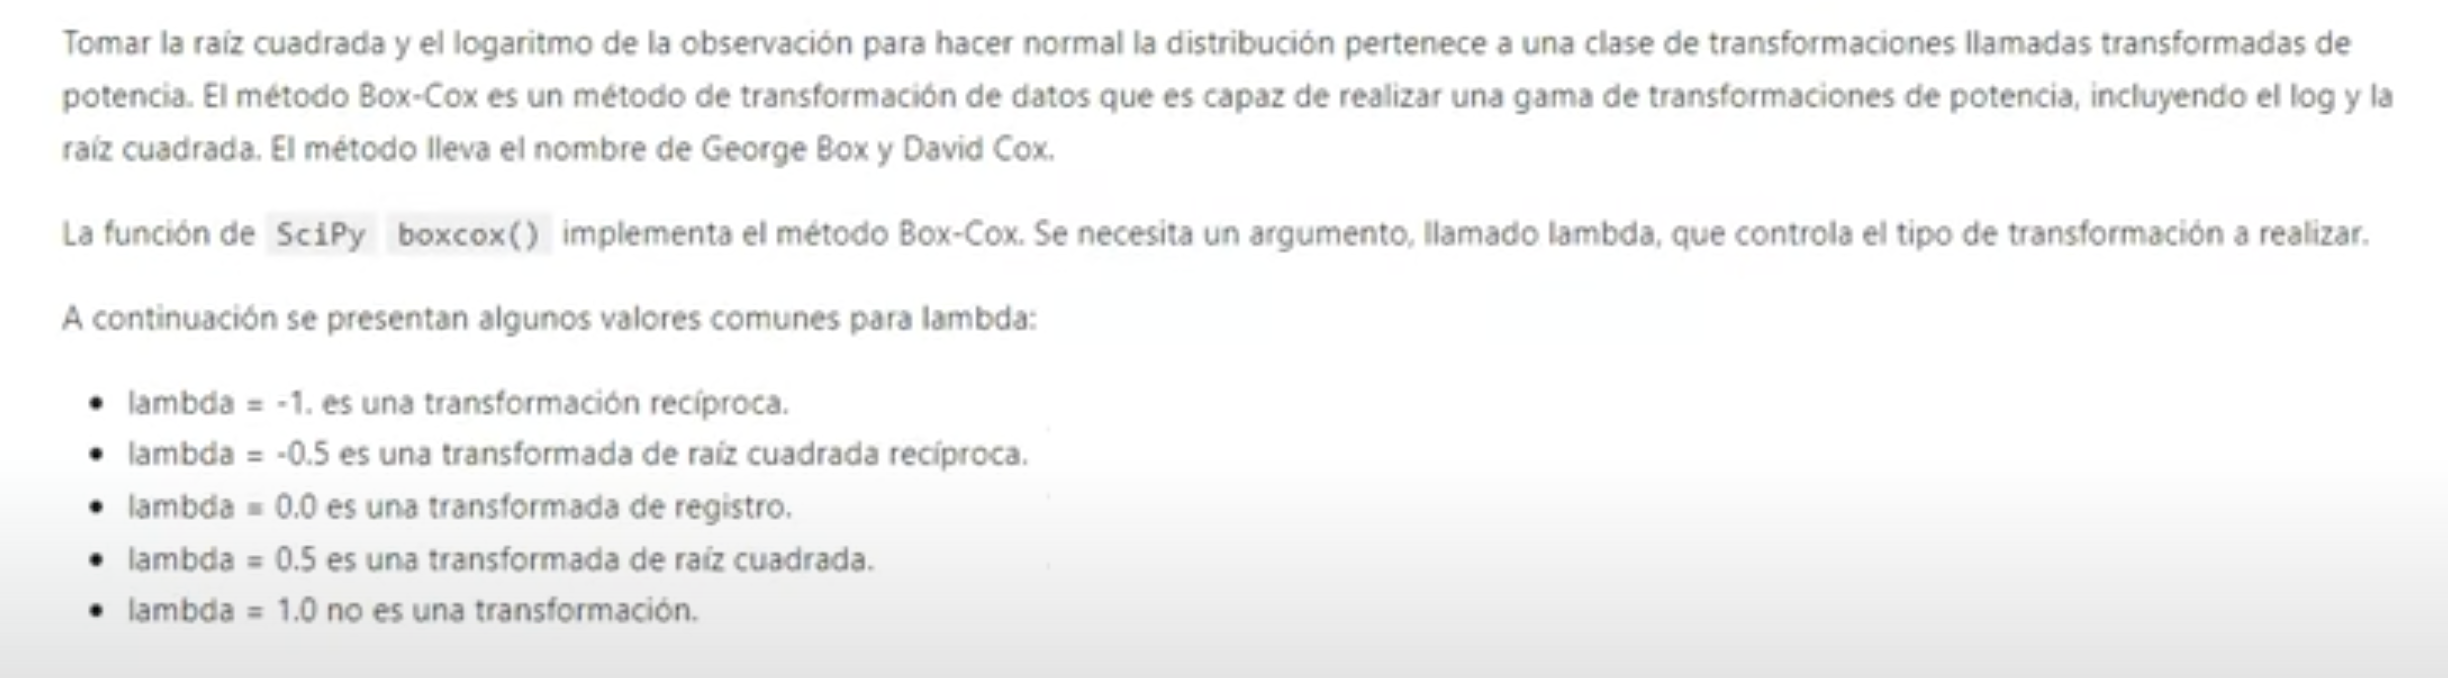

In [ ]:
df3 = X.copy()

In [ ]:
from scipy.stats import boxcox
df3["Box_menos_1"] = boxcox(df3['Age'], -1)
df3["Box_menos_0.5"] = boxcox(df3['Age'], -0.5)
df3["Box_0.0"] = boxcox(df3['Age'], 0.0)
df3["Box_0.5"] = boxcox(df3['Age'], 0.5)

df3.head()

In [ ]:
diagnostic_grafico (df3, "Box_menos_1") 

In [ ]:
diagnostic_grafico (df3, "Box_menos_0.5") 

In [ ]:
diagnostic_grafico (df3, "Box_0.0") 

In [ ]:
diagnostic_grafico (df3, "Box_0.5") 

###Transformación de potencia "Box-Cox" Power Transformer

In [ ]:
X.iloc[:,1:2]

In [ ]:
from sklearn.preprocessing import PowerTransformer

p_scaler = PowerTransformer (method = "box-cox")
cox = pd.DataFrame (p_scaler.fit_transform(X.iloc[:,1:2]))
cox.head()

In [ ]:
cox = cox.rename(columns={0:"Age"})

In [ ]:
diagnostic_grafico (cox, "Age") 

In [ ]:
diagnostic_grafico (A_p, "Age") 

In [ ]:
diagnostic_grafico (df3, "Box_menos_0.5") 

# <a id='5'> 5. Regresión Logistica</a>


In [ ]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression()
loj_model = loj.fit(X_train,y_train)
y_pred_loj = loj_model.predict(X_test)
lr_probability = loj_model.predict_proba(X_test)[:,1]

acc_lr=accuracy_score(y_test,y_pred_loj)
recall_lr=recall_score(y_test,y_pred_loj)
precision_lr=precision_score(y_test,y_pred_loj)
f1score_lr=f1_score(y_test,y_pred_loj)
AUC_LR=roc_auc_score(y_pred_loj,y_test)

#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_loj))
print("ROC_AUC Score:",AUC_LR)

In [ ]:
print(classification_report(y_pred_loj, y_test ))

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_loj)
print(cm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':11}, cmap = 'PuBu',fmt=".0f");

In [ ]:
print("Training Accuracy :", loj_model.score(X_train, y_train))
print("Testing Accuracy :", loj_model.score(X_test, y_test))

In [ ]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

# <a id='6'>6. Random Forest</a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
RF_probability = rf_model.predict_proba(X_test)[:,1]

AUC_RF=roc_auc_score(y_pred_rf,y_test)
acc_rf=accuracy_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
f1score_rf=f1_score(y_test,y_test)

print(accuracy_score(y_pred_rf,y_test))
print("ROC_AUC Score:",AUC_RF)

In [ ]:
print(classification_report(y_pred_rf,y_test ))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_pred_rf, y_test )
print(cm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'RdPu',fmt=".0f")

In [ ]:
X_train

In [ ]:
Importance = pd.DataFrame ({"Importance": rf_model.feature_importances_*100},index=X_train.columns)

In [ ]:
Importance.sort_values(by=['Importance'], ascending=False)

In [ ]:
Importance.sort_values(by = "Importance", axis = 0, ascending=True).plot(kind = "barh", color = "b")
plt.title ("Variables Importantes")
plt.xlabel ("Niveles de Significancia")

# <a id='7'>7. XGBoost </a>


In [ ]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit (X_train, y_train)

In [ ]:
y_pred_xgb_model = xgb_model.predict(X_test)
XGB_probability = xgb_model.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_pred_xgb_model)
recall_xgb=recall_score(y_test,y_pred_xgb_model)
precision_xgb=precision_score(y_test,y_pred_xgb_model)
f1score_xgb=f1_score(y_test,y_pred_xgb_model)

AUC_xgb=roc_auc_score(y_pred_xgb_model,y_test)


print(accuracy_score(y_pred_xgb_model,y_test))
print("ROC_AUC Score:",AUC_xgb)

In [ ]:
print(classification_report (y_pred_xgb_model,y_test))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title(f'ROC Curve (AUC={AUC_xgb:.4f})')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

xgb_model = XGBClassifier().fit (X_train, y_train)
y_score = xgb_model.predict_proba (X_test)[:,1]

fpr, tpr, thresholds = roc_curve (y_test, y_score)

fig = px.area (
    x = fpr, y=tpr, 
    title=f'ROC Curve (AUC={auc(fpr,tpr):.4f})', 
    labels = dict (x = 'Flase Positive Rate', y = 'True Positive Rate'), 
    width = 500, height = 500
)
fig.add_shape (
    type = 'line', line = dict (dash='dash'),
    x0=0 , x1=1, y0=0 , y1=1
)

fig.update_yaxes (scaleanchor = "x", scaleratio = 1)
fig.update_xaxes (constrain = 'domain')
fig.show()



In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_model)
print(cm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'GnBu',fmt=".1f")

In [ ]:
xgb.plot_importance (xgb_model)
plt.title("Variable Importance")

In [ ]:
#Model Tuning
xgb_model = XGBClassifier(random_state=42, max_depth=8, n_estimators=3000,
                          reg_lambda=1.2,reg_alpha=1.2,
                          min_child_weight=1, objective='binary:logistic',
                          learning_rate=0.15, gamma= 0.3, colsample_bytree= 0.5,
                          eval_metric = 'auc').fit(X_train,y_train)

In [ ]:
y_pred_xgb_model = xgb_model.predict(X_test)
acc_xgb = accuracy_score (y_pred_xgb_model, y_test )

print(accuracy_score(y_pred_xgb_model,y_test))

In [ ]:
print(classification_report (y_pred_xgb_model,y_test))

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_pred_xgb_model, y_test)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'GnBu',fmt=".1f")

# <a id='8'> 8. Gaussian Naive Bayes</a>

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_nb)

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test, y_pred_nb))

# <a id='9'>9. KNN</a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_knn)

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test, y_pred_knn))

# <a id='10'>10. Artificial Neural Networks </a>

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)

In [ ]:
y_pred_mlpc =mlpc.predict (X_test)
accuracy_score(y_test,y_pred_mlpc)

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_mlpc)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test, y_pred_mlpc))

 # <a id='11'> 11. Gradient Boosting Machines </a>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred_gbm = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred_gbm)

In [ ]:
print(classification_report(y_test, y_pred_gbm))

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

# <a id='12'>12. LightGBM </a>

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from pandas._libs.lib import is_datetime_with_singletz_array
from re import VERBOSE
from pandas.core.common import random_state
LGB_model = LGBMClassifier(random_state=42, max_depth=8, n_estimators=3000,
                          reg_lambda=1.2,reg_alpha=1.2,
                          min_child_weight=1,verbose =1,
                           learning_rate=0.15, gamma = 0.3,  colsample_bytree= 0.5,
                          eval_metric = 'auc', is_higher_better = 1, plot = True)
LGB_model.fit(X_train,y_train)

In [ ]:
y_pred_LGB_model = LGB_model.predict(X_test)
accuracy_score (y_test, y_pred_LGB_model)

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_LGB_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test,y_pred_LGB_model))

# <a id='13'> 13. Comparando todos los modelos </a>

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

In [ ]:
models = [
    knn_model,
    loj_model,
    nb_model,
    mlpc,
    gbm_model,
    LGB_model, 
    xgb_model,
    rf_model,    
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

In [ ]:


result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Accuracy Ratios of Models')
plt.show()

In [ ]:
results.sort_values(by=['Accuracy'], inplace=True, ascending=False)
print (results)


Prueba del Modelo

In [ ]:
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

dftrain = df.copy()

dftrain['Gender']= dftrain['Gender'].map(gender_map)
dftrain['Vehicle_Age']= dftrain['Vehicle_Age'].map(vehicle_age_map)
dftrain['Vehicle_Damage']= dftrain['Vehicle_Damage'].map(vehicle_damage_map)
dftrain.head(5)


In [ ]:
dftrain.loc[dftrain.loc[:, 'Response'] == 0]

In [ ]:
dftrain.loc[dftrain.loc[:, 'Response'] == 1]

In [ ]:
#Normalización de los datos
dftrain = (dftrain - np.min(dftrain)) / (np.max(dftrain) - np.min(dftrain)).values

In [ ]:
dftrain.loc[dftrain.loc[:, 'Response'] == 0]

In [ ]:
dftrain.loc[dftrain.loc[:, 'Response'] == 1]

In [ ]:
#Se copian solo los que respondieron "1"
dfone= dftrain.loc[dftrain.loc[:, 'Response'] == 1].copy()

#Se elimina las 2 columnas para cumplir con los 10 elementos del modelo y poderlos predecir
dfone=dfone.drop(['id', 'Response'], axis=1)
dfone.head()

Predicción Randomforest

In [ ]:
#Se elimina las 2 columnas para cumplir con los 10 elementos del modelo y poderlos predecir
dfone=dfone.drop(['Gender'], axis=1)

#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
rf_model.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = rf_model.predict(dfone)
np.where(np_array == 1)

Predicción MPLC

In [ ]:
#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
mlpc.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = mlpc.predict(dfone)
np.where(np_array == 1)

Predicción Regresión Lógistica

In [ ]:
#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
loj_model.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = loj_model.predict(dfone)
np.where(np_array == 1)

Predicción GBM Model

In [ ]:
#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
gbm_model.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = gbm_model.predict(dfone)
np.where(np_array == 1)

Primeros Valores

In [ ]:
#primer elmento del arreglo con valor nomralizado de  rf_model.predict(dfone)
dfone[155: 156] 

In [ ]:
#primer elmento del arreglo con valor nomralizado de  mlpc.predict(dfone)
dfone[663: 664] 

In [ ]:
#primer elmento del arreglo con valor nomralizado de loj_model.predict(dfone)
dfone[668: 669] 

In [ ]:
#primer elmento del arreglo con valor nomralizado de gbm_model.predict(dfone)
dfone[1377: 1378] 


In [ ]:
#se muestran todos los elementos que si hicieron hit con su valores normalizados solo para  gbm_model.predict(dfone) total 15 registros
cambio = list(np.where(np_array == 1))
resul = dfone.iloc[cambio[0]]

In [ ]:
resul.describe()

In [ ]:
resul

In [ ]:
resul.dtypes 

In [ ]:
resul.info() 

In [ ]:
counterFunc = resul.apply(lambda x: True if x['Age'] == 0.200000 else False , axis=1)
numOfRows = len(counterFunc[counterFunc == True].index)
print('Row count:',numOfRows)

In [ ]:
                       #[Gender, Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(mlpc.predict([     [0.0,	0.200000,	1.0,    0.538462,	0.0,	0.0,	1.0,	0.137865,	0.154321,	0.446367	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.073547,	0.759259,	0.439446	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.369231,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.077117,	0.759259,	0.103806    ],
                         [1.0,	0.461538,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.0,	0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado

In [ ]:
# se valida un valor que hizo HIT en la predicción son normalizar
df.iloc[5415: 5416]

In [ ]:
#se crea data frame normalizado
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

dfnor = df.copy()

dfnor['Gender']= dfnor['Gender'].map(gender_map)
dfnor['Vehicle_Age']= dfnor['Vehicle_Age'].map(vehicle_age_map)
dfnor['Vehicle_Damage']= dfnor['Vehicle_Damage'].map(vehicle_damage_map)


dfnor = (dfnor - np.min(dfnor)) / (np.max(dfnor) - np.min(dfnor)).values

In [ ]:
#Dato Normalizado
dfnor.iloc[5415: 5416]

In [ ]:


#[Gender, Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(loj_model.predict([[1.0,	0.200000,	1.0,	0.576923,	0.0,	1.0,	1.0,	0.049842,	0.154321,	0.366782    ],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.073547,	0.759259,	0.439446	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.369231,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.077117,	0.759259,	0.103806    ],
                         [1.0,	0.461538,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.0,	0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado

In [ ]:

#[Gender, Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(gbm_model.predict([[1.0,	0.400000,	1.0,	0.0,     	0.0,	1.0,	1.0,	0.120117,	0.154321,	0.934256	],
                         [1.0,	0.184615,	1.0,	0.538462,	0.0,    0.0,	1.0,	0.000000,	1.000000,	0.996540	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.369231,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.077117,	0.759259,	0.103806    ],
                         [1.0,	0.461538,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.0,	0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado

In [ ]:


#[ Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(rf_model.predict([ [0.600000,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.109451,	0.154321,	0.453287],
                         [0.861538,	1.0	, 0.057692,	0.0,	0.5,	1.0,	0.057496,	0.154321,	0.598616],	
                         [0.630769,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.076730,	0.154321,	0.446367],
                         [0.40000,	1.0,	0.0,      0.0,	1.0,	1.0,	0.120117,	0.154321,	0.934256	],
                         [0.184615,	1.0,	0.538462,	0.0,  0.0,	1.0,	0.000000,	1.000000,	0.996540	],
                         [0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.369231,	1.0,	0.538462,	0.0,	0.0,  1.0,	0.077117,	0.759259,	0.103806    ],
                         [0.461538,	1.0,	0.538462,	0.0,	0.0,  1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado

**Conclusion**

*  Customers of age between 30 to 60 are more likely to buy insurance.
*  Customers with Driving License have higher chance of buying Insurance.
*  Customers with Vehicle_Damage are likely to buy insurance.
*  The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.
*  Comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.